<a href="https://colab.research.google.com/github/gabrielaaguiv5/MLTesting/blob/main/Modelos_de_regresi%C3%B3n_machine_learnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taller de benchmarking modelos de regresión

Para la entrega del siguiente taller cada equipo debe cumplir las siguientes condiciones:

1. Seleccionar una de las 3 bases de datos dispuestas anteriormente en este correo

2. Realizar los respectivos pre-procesamientos (con todas las buenas prácticas expuestas en clase) para balancear, limpiar, transformar y corregir la base de datos

3. Seleccionar 3 algoritmos de regresión, para estimar la variable cuantitativa expuesta en clase de la base de datos seleccionada. Realizar un benchmarking de los 3 modelos, en los que se compare cada uno de los modelos en el entrenamiento, testing y validación (usar cross-validation) basado en una de las siguientes métricas:
RMSE
MSE
MAE

4. El tamaño máximo de los equipos es de 3 personas.




# 1. Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# 2. Importando y leyendo la data

### **API de Kaggle**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/red-wine-quality-cortez-et-al-2009


In [ ]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Limpieza de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.shape

(1599, 12)

In [ ]:
# Verificar nulos
print("Nulos por columna:")
df.isna().sum()

Nulos por columna:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.duplicated().sum()

np.int64(240)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,True
...,...
1594,False
1595,False
1596,True
1597,False


In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()

df.duplicated()

,0
0,False
1,False
2,False
3,False
5,False
...,...
1593,False
1594,False
1595,False
1597,False


# 4. Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


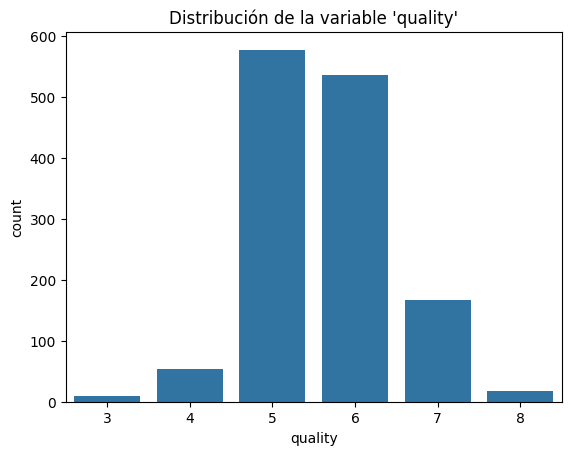

In [ ]:
# Conteo de clases
sns.countplot(x="quality", data=df)
plt.title("Distribución de la variable 'quality'")
plt.show()

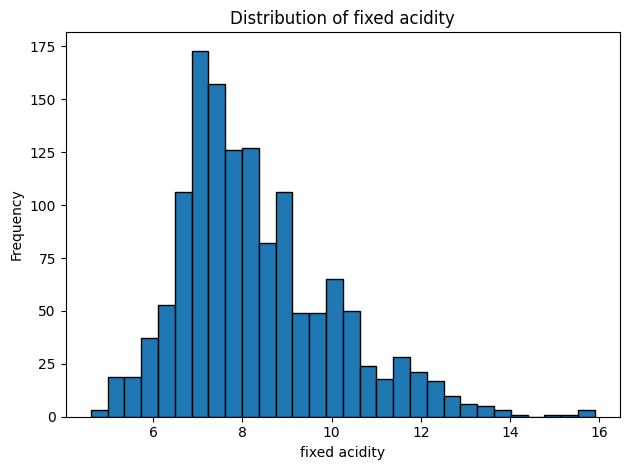

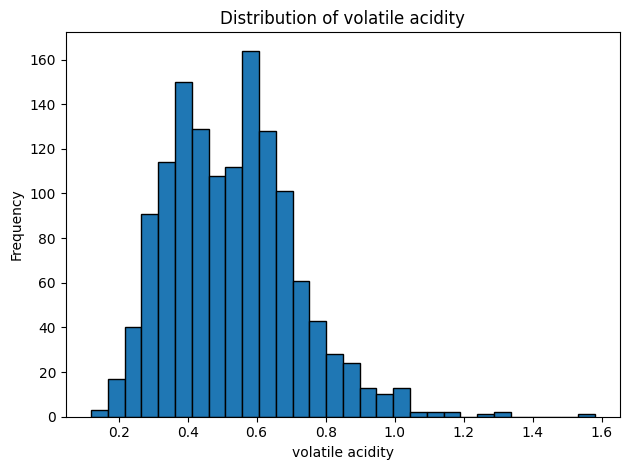

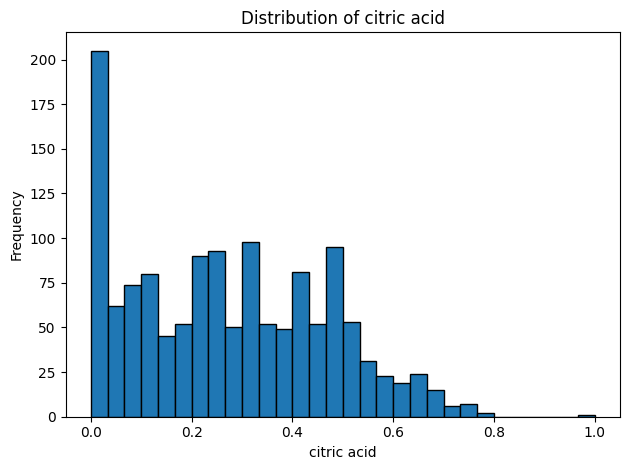

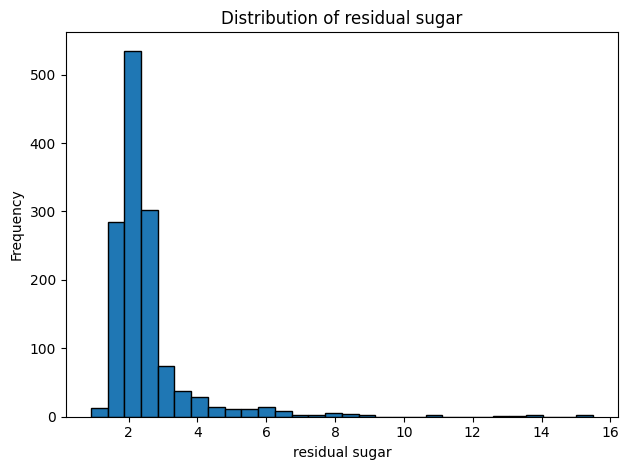

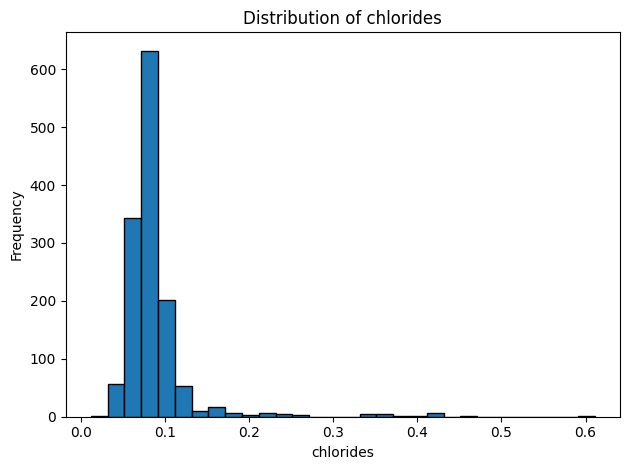

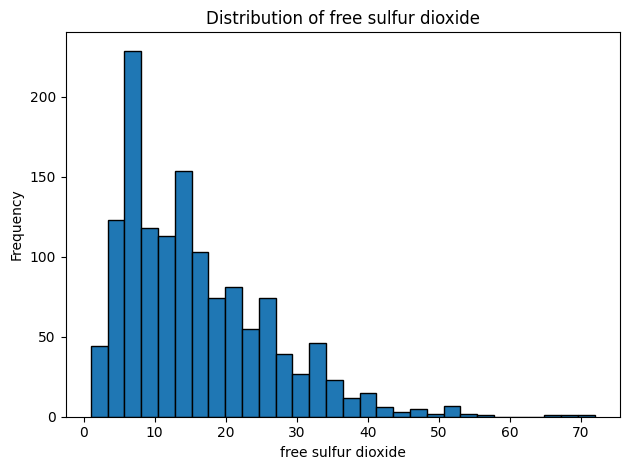

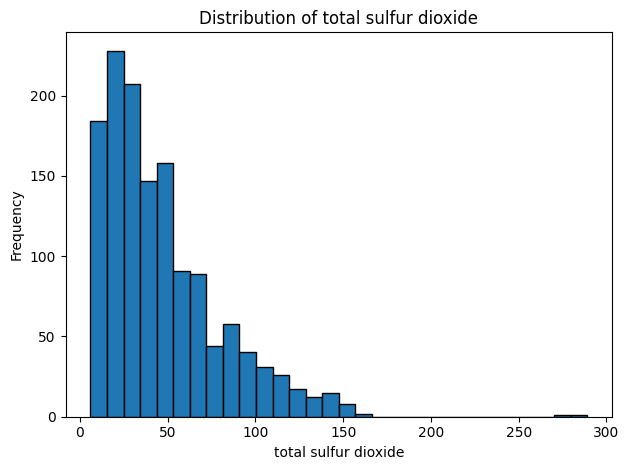

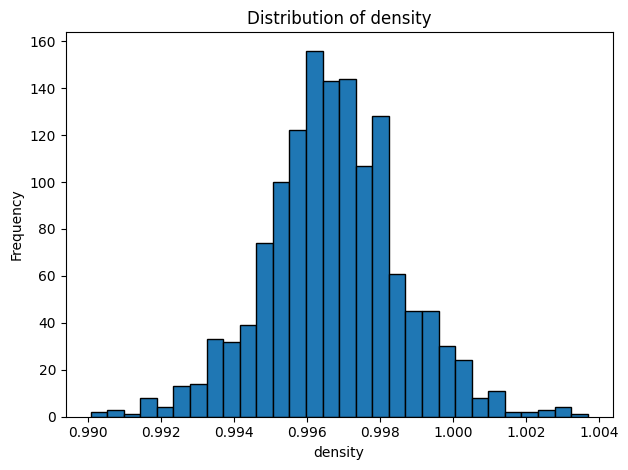

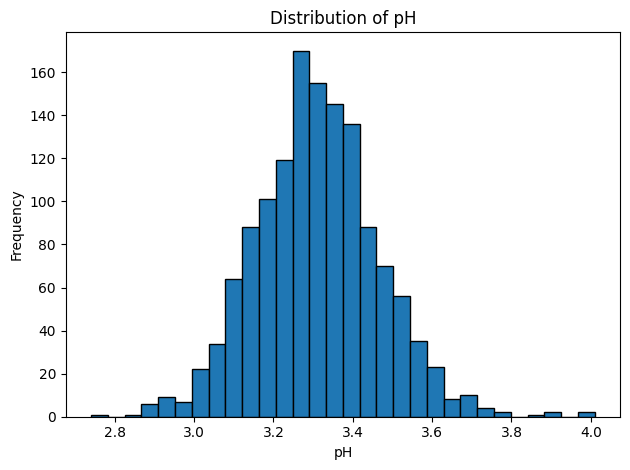

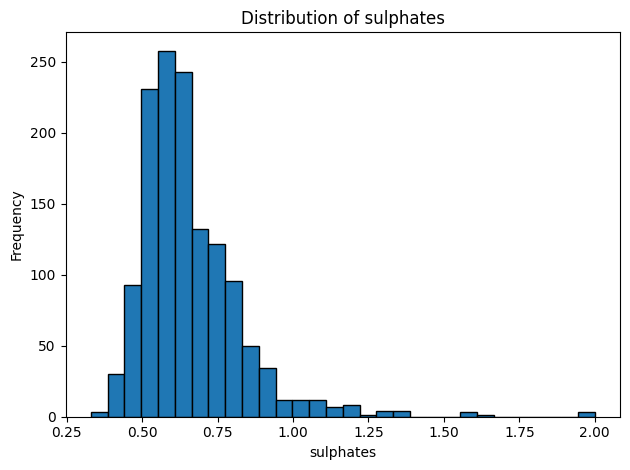

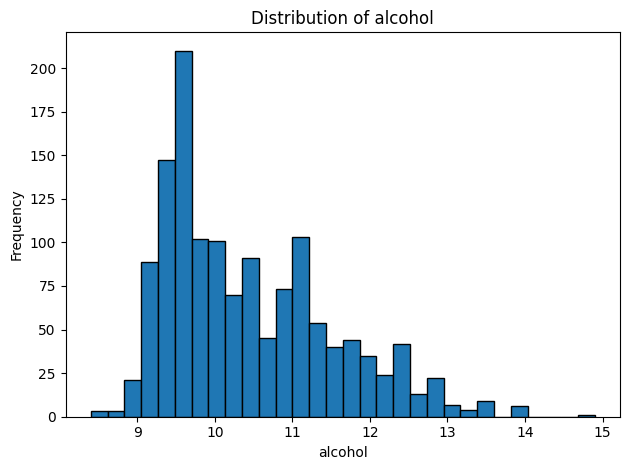

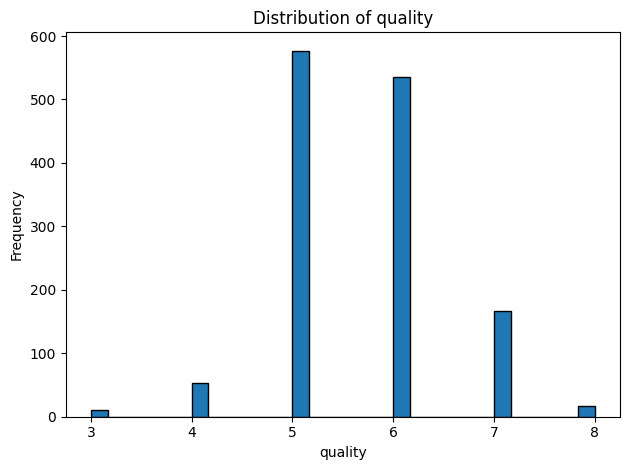

In [ ]:
# Histogramas de todas las columnas para visualizar la distribución de los datos
for col in df.columns:
    plt.figure()
    plt.hist(
        df[col],
        bins=30,
        edgecolor="black"
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

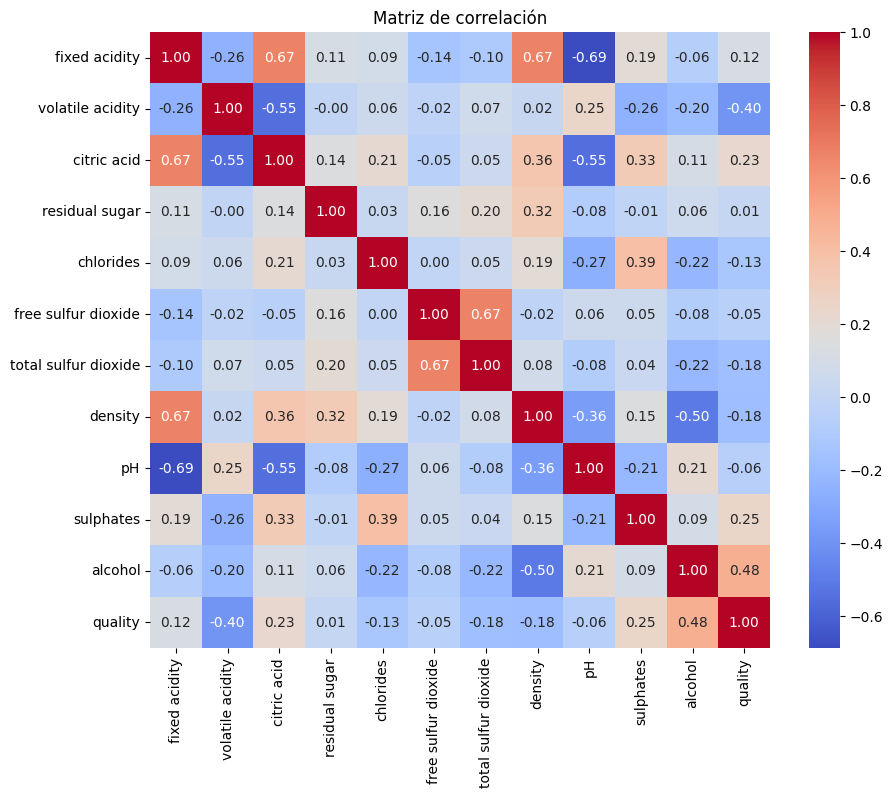

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

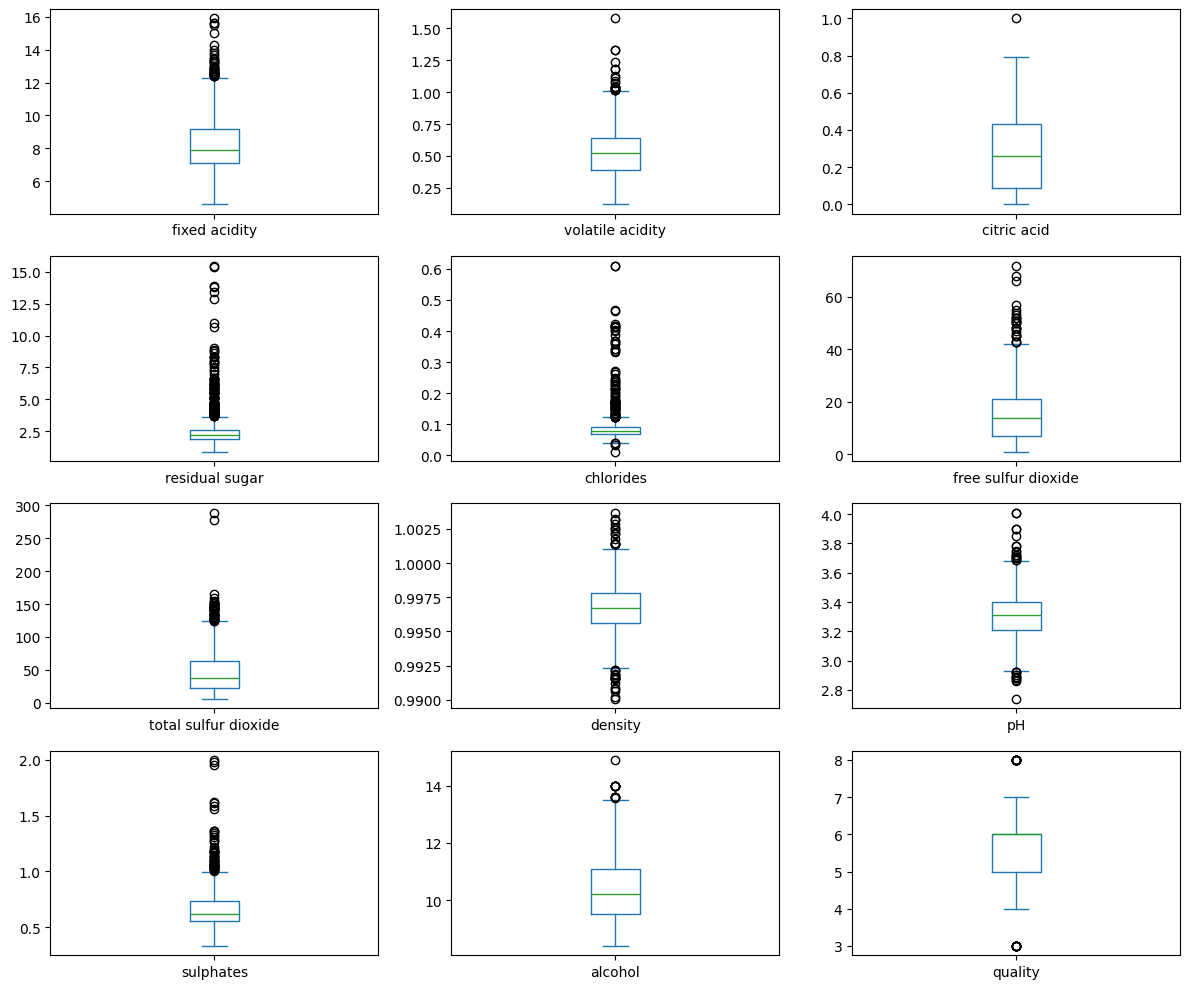

In [ ]:
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(12,10), sharex=False)
plt.tight_layout()
plt.show()

Variables más correlacionadas con calidad:
 quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64


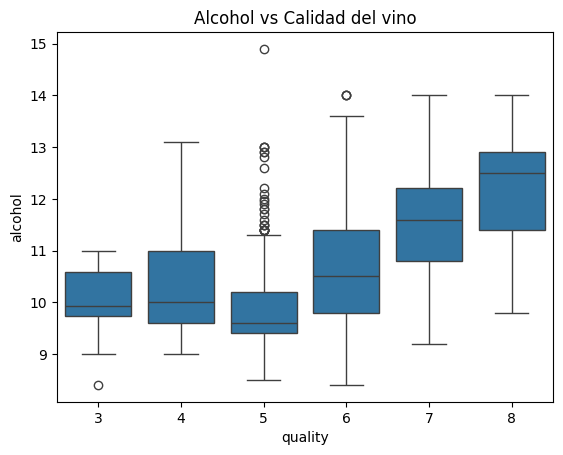

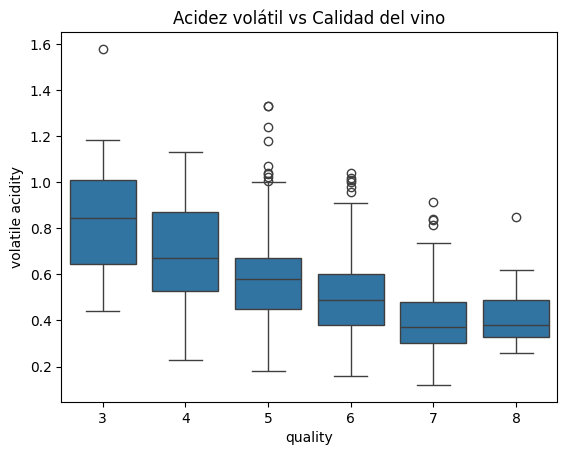

In [ ]:
# Seleccionar las variables más correlacionadas con 'quality'
correlations = df.corr()["quality"].sort_values(ascending=False)
print("Variables más correlacionadas con calidad:\n", correlations)

# Visualizar algunas relaciones
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol vs Calidad del vino')
plt.show()

sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Acidez volátil vs Calidad del vino')
plt.show()

✔ Se eliminaron duplicados

✔ Se verificaron nulos

✔ Se exploró la variable objetivo y las correlaciones

✔ Se visualizaron outliers

# 5. Tratamiento de Outliers y estandarización de la data

# **Eliminar columna de "Quality" que es la columna target**

In [ ]:
df_analisis = df.drop(columns="quality")
df_analisis.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [ ]:
y = df['quality']
y

,quality
0,5
1,5
2,5
3,6
5,5
...,...
1593,6
1594,5
1595,6
1597,5


In [ ]:
skew_vals = df_analisis.skew().sort_values(ascending=False)
skewed_cols = skew_vals[skew_vals.abs() > 1].index.tolist()
print(skewed_cols)

['chlorides', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'free sulfur dioxide']


In [ ]:
skew_vals

,0
chlorides,5.502487
residual sugar,4.548153
sulphates,2.406505
total sulfur dioxide,1.540368
free sulfur dioxide,1.226579
fixed acidity,0.941041
alcohol,0.859841
volatile acidity,0.729279
citric acid,0.312726
pH,0.232032


In [ ]:
from scipy.stats import yeojohnson

cols_sqrt = ['total sulfur dioxide', 'free sulfur dioxide']

df_analisis['chlorides'], _ = yeojohnson(df['chlorides'])
df_analisis['residual sugar'], _ = yeojohnson(df['residual sugar'])
df_analisis['sulphates'], _ = yeojohnson(df['sulphates'])
df_analisis[cols_sqrt] = np.sqrt(df[cols_sqrt] )


In [ ]:
skew_vals = df_analisis.skew().sort_values(ascending=False)
skewed_cols = skew_vals[skew_vals.abs() > 1].index.tolist()
print(skewed_cols)

[]


In [ ]:
skew_vals

,0
fixed acidity,0.941041
alcohol,0.859841
volatile acidity,0.729279
total sulfur dioxide,0.641341
free sulfur dioxide,0.476858
citric acid,0.312726
pH,0.232032
density,0.044778
sulphates,0.014637
residual sugar,-0.001715


In [ ]:
skew_vals

,0
fixed acidity,0.941041
alcohol,0.859841
volatile acidity,0.729279
total sulfur dioxide,0.641341
free sulfur dioxide,0.476858
citric acid,0.312726
pH,0.232032
density,0.044778
sulphates,0.014637
residual sugar,-0.001715


# 6. Modelos de Regresión

Modelos a utilizar


*   SVR(kernel = rbf)
*   Arboles de decisión
*   SVR(kernel = poly)



# **Dividiendo datos para el entrenamiento**

In [ ]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(df_analisis, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # ← ajusta y escala

# Usar el MISMO scaler para el test
X_test_scaled  = scaler.transform(X_test)        # ← solo escala

# DecisionTreeClassifier

Constructor del modelo de regresión basado en árbol de decisión:

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)



*   Árbol básico de máximo 2 decisiones (niveles)
*   random_state para asegurar el árbol independiente de múltiples ejecuciones al código



Definición de hiperparámetros:
Los parámetros se definen con el fin de controlar y afinar el comportamiento del algoritmo de aprendizaje, buscano evitar errores como over-fitting.

In [ ]:
parametros = {
    "max_depth":        [None, 3, 4, 5, 6],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion":        ["squared_error", "friedman_mse"]
}



1.   max_depth: La profundidad máxima del árbol, es decir que tanto puede "crecer":

  *   None - Crecimiento sin límite pero riesgo de overfitting
  *   3, 4, 5, 6 - En este caso en datasets con muchas filas no se recomienda más niveles que ~10 pero 2 niveles puede sub-ajustar el modelo

2.   min_samples_split: Número mínimo de muestras necesarias para dividir un nodo

  *   2 = valor por defecto, sin restricción.
  *   Máx de 10 para controlar el número de combinaciones

3.   min_samples_leaf: El número mínimo de muestras en una hoja (leaf node - hoja sin hijos). Evita hojas muy específicas y ayuda a generalizar patrones

  *   1 = valor por defecto
  *   2 y 4 - Involucran interacciones entre los vinos

4.   criterion: Métrica usada para decidir la mejor división

  *   squared_error - error cuadrático medio (MSE).
  *   friedman_mse - variante optimizada para modelos de boosting


GridSearchCV busca los mejores hiperparámetros por medio de validación cruzada:

In [ ]:
mejorpar = GridSearchCV(
    tree_reg, parametros,
    scoring="neg_root_mean_squared_error", # error cuadrático medio negativo usado para evaluar el modelo
    cv=5, n_jobs=-1) # validación cruzada de 5 particiones (folds) para evaluar cada combinación de parámetros

mejorpar.fit(X_train, y_train) # entrena y evalúa el modelo para todas las combinaciones de parámetros
# mejorpar almacena: los mejores hiperparámetros y el mejor modelo ajustado

best_tree = mejorpar.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, random_state=42)

Predicción y métricas

In [ ]:
y_pred = best_tree.predict(X_test) # predicción según los mejores hiperparámetros
mse_a  = mean_squared_error(y_test, y_pred)
rmse_a = np.sqrt(mse_a)
mae_a  = mean_absolute_error(y_test, y_pred)
print(f"Test MSE = {mse_a:.3f}")
print(f"Test RMSE = {rmse_a:.3f}")
print(f"Test MAE  = {mae_a:.3f}")

Test MSE = 0.466
Test RMSE = 0.683
Test MAE  = 0.512




*   MSE - Errores grandes
*   RMSE - Errores grandes en misma unidad a datos originales
*   MAE - Promedio de las diferencias entre los valores predichos y los reales - 0.5 habla de error 2 de cada 3 predicciones


Visualizando árbol de decisión y la importancia de cada variable usada por el árbol:

alcohol                 0.645401
sulphates               0.233028
volatile acidity        0.121571
citric acid             0.000000
fixed acidity           0.000000
residual sugar          0.000000
chlorides               0.000000
total sulfur dioxide    0.000000
free sulfur dioxide     0.000000
pH                      0.000000
dtype: float64


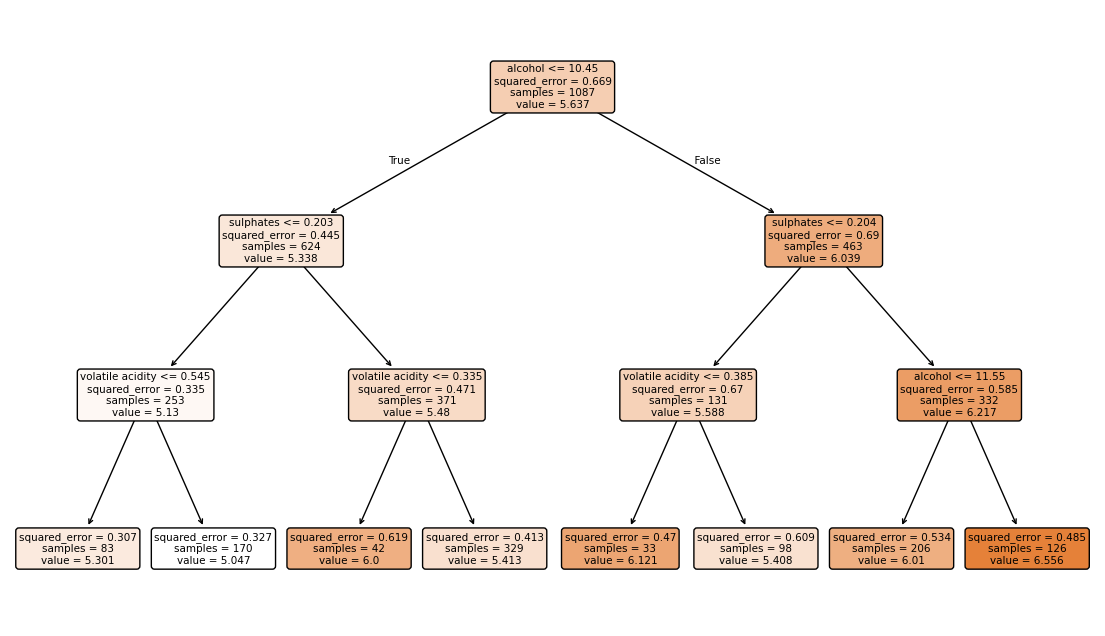

In [ ]:
importances = pd.Series(best_tree.feature_importances_, index=df_analisis.columns)
print(importances.sort_values(ascending=False)[:10])

plt.figure(figsize=(14,8))
plot_tree(best_tree,
          feature_names=df_analisis.columns,
          rounded=True, filled=True,
          max_depth=3)
plt.show()



*   Cuanto mayor el valor, más útil fue esa variable para dividir los datos.
*   Valores entre 0 y 1. La suma total es 1.
*   El árbol primero divide por nivel de alcohol. El alcohol es la variable más importante para predecir la calidad del vino (está en la raíz).
*  Si el vino tiene alcohol ≤ 10.45, va por la rama izquierda; si no, por la derecha.
*  En todo el conjunto, el valor medio de calidad es 5.637.
*  En general, los vinos con bajo alcohol y sulfitos tienden a tener calidad entre 5.0 y 6.0. Mientras vinos con más alcohol y sulfitos moderados/altos tienen mayor calidad predicha, llegando hasta ~6.56.





In [ ]:
metricas = {
    "Modelo A": {"MSE": 0.466, "RMSE": 0.683, "MAE": 0.512},
    "Modelo B": {"MSE": 0.501, "RMSE": 0.708, "MAE": 0.541},
    "Modelo C": {"MSE": 0.431, "RMSE": 0.656, "MAE": 0.498},
}
# -----------------------------------------------------------------------------

# 2️⃣  Creamos un DataFrame con los modelos como filas
df = pd.DataFrame(metricas).T     # .T → transpone para que filas = modelos

# 3️⃣  Detectamos el valor mínimo y el modelo ganador por métrica
valor_minimo = df.min()           # serie con el menor valor por columna
modelo_ganador = df.idxmin()      # serie con el nombre del modelo ganador

# 4️⃣  Imprimimos resultados
for metrica in df.columns:
    print(f"Mejor {metrica}: {modelo_ganador[metrica]} "
          f"con {valor_minimo[metrica]:.3f}")

Mejor MSE: Modelo C con 0.431
Mejor RMSE: Modelo C con 0.656
Mejor MAE: Modelo C con 0.498
